# Préparation du dataset

## Import du dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir

path = "./weather_dataset/dataset/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

FileNotFoundError: ignored

## Création des labels des photos à partir du nom des images

In [ ]:
from sklearn import preprocessing

list_labels = ["cloudy", "rain", "shine", "sunrise"]
label_name = "no_name "

def photo_class(photo) :
    for label in list_labels :
        if label in photo : 
            return label
    return label_name
    
data = pd.DataFrame()
data["image_path"] = list_photos
data["label_name"] = data["image_path"].apply(lambda x : photo_class(x))
le = preprocessing.LabelEncoder()
data["label"] = le.fit_transform(data["label_name"])
data

,image_path,label_name,label
0,cloudy1.jpg,cloudy,0
1,cloudy10.jpg,cloudy,0
2,cloudy100.jpg,cloudy,0
3,cloudy11.jpg,cloudy,0
4,cloudy12.jpg,cloudy,0
...,...,...,...
395,sunrise95.jpg,sunrise,3
396,sunrise96.jpg,sunrise,3
397,sunrise97.jpg,sunrise,3
398,sunrise98.jpg,sunrise,3


In [ ]:
data.groupby("label").count()

,image_path,label_name
label,,
0,100,100
1,100,100
2,100,100
3,100,100


## Affichage d'exemples d'images par label

cloudy


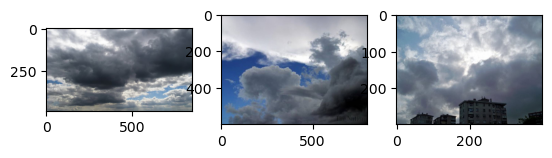

rain


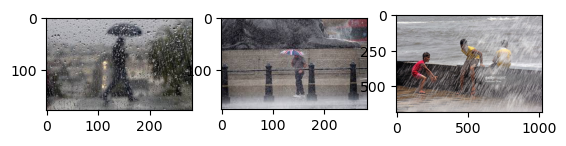

shine


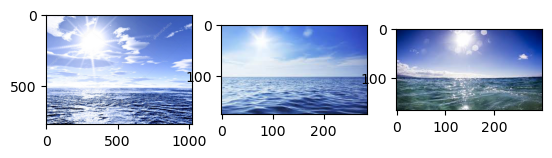

sunrise


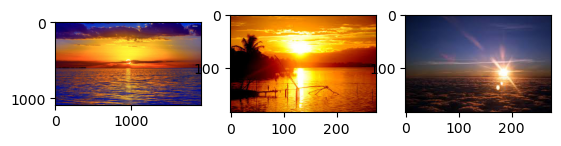

In [ ]:
from matplotlib.image import imread

def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(data)) if data["label_name"][i]==name]
    return list_image_name

list_cloudy=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=="cloudy"]
list_rain=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=="rain"]
list_shine=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=="shine"]
list_sunrise=[list_photos[i] for i in range(len(data)) if data["label_name"][i]=="sunrise"]

for name in list_labels :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

## Détermination et affichage des descripteurs SIFT

* L'image contient 319 descripteurs
* Chaque descripteur est un vecteur de longueur 128

In [ ]:
pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install opencv-contrib-python


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 44.9/44.9 MB 9.5 MB/s eta 0:00:00


In [ ]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
adal                          1.2.7
aiofiles                      23.1.0
aiohttp                       3.8.4
aiokafka                      0.8.0
aiosignal                     1.3.1
alabaster                     0.7.12
alembic                       1.9.2
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argcomplete                   2.0.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autop


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import cv2

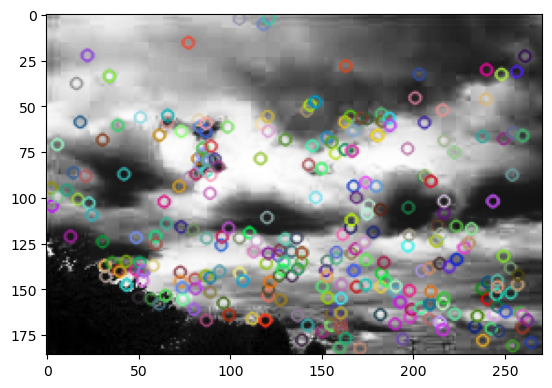

Descripteurs :  (319, 128)

[[ 21.   2.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...  21.  13.  12.]
 [  1.   1.   0. ...  13.   1.   3.]
 ...
 [ 46.  22.   0. ...   0.   0.   0.]
 [ 26. 140.   5. ...   1.   0.   0.]
 [ 49.  33.   4. ...  59.   2.   1.]]


In [ ]:
import cv2

sift =  cv2.SIFT_create()
image = cv2.imread(path+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)


# Pré-traitement des images via SIFT

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [ ]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4748\3880497225.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(sift_keypoints)



Nombre de descripteurs :  (150144, 128)
temps de traitement SIFT descriptor :           118.29 secondes


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [ ]:

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
k

387

In [ ]:
pd.DataFrame(sift_keypoints_all).isnull().sum().sort_values(ascending = False)[0:30]

0     0
1     0
94    0
93    0
92    0
91    0
90    0
89    0
88    0
87    0
86    0
85    0
84    0
83    0
82    0
81    0
80    0
79    0
78    0
77    0
76    0
75    0
74    0
73    0
72    0
71    0
70    0
69    0
68    0
67    0
dtype: int64

In [ ]:
pip install --upgrade threadpoolctl


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
adal                          1.2.7
aiofiles                      23.1.0
aiohttp                       3.8.4
aiokafka                      0.8.0
aiosignal                     1.3.1
alabaster                     0.7.12
alembic                       1.9.2
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argcomplete                   2.0.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autop


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install numpy === 1.21.4

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '==='

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
adal                          1.2.7
aiofiles                      23.1.0
aiohttp                       3.8.4
aiokafka                      0.8.0
aiosignal                     1.3.1
alabaster                     0.7.12
alembic                       1.9.2
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argcomplete                   2.0.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autop


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install numpy==1.21.4

     --------------------------------------- 14.0/14.0 MB 10.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.21.4 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
adal                          1.2.7
aiofiles                      23.1.0
aiohttp                       3.8.4
aiokafka                      0.8.0
aiosignal                     1.3.1
alabaster                     0.7.12
alembic                       1.9.2
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argcomplete                   2.0.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autop


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
a

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,51.0,0.0,0.0,0.0,0.0,0.0,1.0,95.0,99.0,7.0,...,0.0,1.0,1.0,3.0,11.0,76.0,127.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,3.0,83.0,129.0,45.0,0.0,0.0,1.0,0.0,10.0
2,0.0,0.0,0.0,0.0,0.0,8.0,112.0,39.0,0.0,0.0,...,0.0,0.0,0.0,68.0,47.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,2.0,58.0,74.0,5.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,84.0,112.0,92.0,2.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150139,22.0,1.0,0.0,0.0,44.0,8.0,0.0,2.0,160.0,4.0,...,0.0,1.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
150140,136.0,53.0,0.0,1.0,0.0,0.0,0.0,0.0,44.0,37.0,...,0.0,9.0,7.0,0.0,0.0,78.0,136.0,0.0,0.0,0.0
150141,37.0,2.0,0.0,0.0,35.0,6.0,0.0,0.0,164.0,14.0,...,0.0,8.0,22.0,14.0,2.0,1.0,38.0,6.0,1.0,4.0
150142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,14.0,0.0,0.0,0.0,0.0,54.0,141.0,8.0,1.0


In [ ]:
sift_keypoints_all.

array([[ 51.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   1.,   0.,  10.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 37.,   2.,   0., ...,   6.,   1.,   4.],
       [  0.,   0.,   0., ..., 141.,   8.,   1.],
       [121.,  29.,  16., ...,   0.,   0.,   7.]], dtype=float32)

In [ ]:
a = pd.DataFrame(sift_keypoints_all)
a[a.notnull()]

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,51.0,0.0,0.0,0.0,0.0,0.0,1.0,95.0,99.0,7.0,...,0.0,1.0,1.0,3.0,11.0,76.0,127.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,3.0,83.0,129.0,45.0,0.0,0.0,1.0,0.0,10.0
2,0.0,0.0,0.0,0.0,0.0,8.0,112.0,39.0,0.0,0.0,...,0.0,0.0,0.0,68.0,47.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,2.0,58.0,74.0,5.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,84.0,112.0,92.0,2.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150139,22.0,1.0,0.0,0.0,44.0,8.0,0.0,2.0,160.0,4.0,...,0.0,1.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
150140,136.0,53.0,0.0,1.0,0.0,0.0,0.0,0.0,44.0,37.0,...,0.0,9.0,7.0,0.0,0.0,78.0,136.0,0.0,0.0,0.0
150141,37.0,2.0,0.0,0.0,35.0,6.0,0.0,0.0,164.0,14.0,...,0.0,8.0,22.0,14.0,2.0,1.0,38.0,6.0,1.0,4.0
150142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,14.0,0.0,0.0,0.0,0.0,54.0,141.0,8.0,1.0


In [ ]:
kmeans.fit(sift_keypoints_all)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
#k=40
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  387
Création de 387 clusters de descripteurs ...


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


temps de traitement kmeans :             3.91 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [ ]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
temps de création histogrammes :             1.63 secondes


In [ ]:
hist_vectors

[array([0.        , 0.01351351, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01351351,
        0.        , 0.        , 0.        , 0.01351351, 0.01351351,
        0.01351351, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01351351, 0.        , 0.        ,
        0.        , 0.06756757, 0.        , 0.01351351, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01351351,
        0.01351351, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01351351,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [ ]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (400, 387)
Dimensions dataset après réduction PCA :  (400, 251)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [ ]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label_name"]
print(df_tsne.shape)


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(400, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images
* Les catégories "cloudy" et "rain" sont partiellement séparées

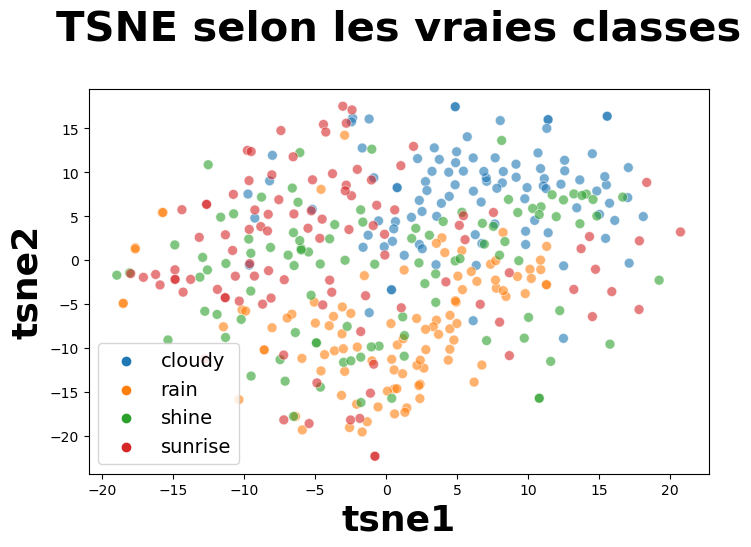

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [ ]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=4, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(400, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI de 0.15 reste faible

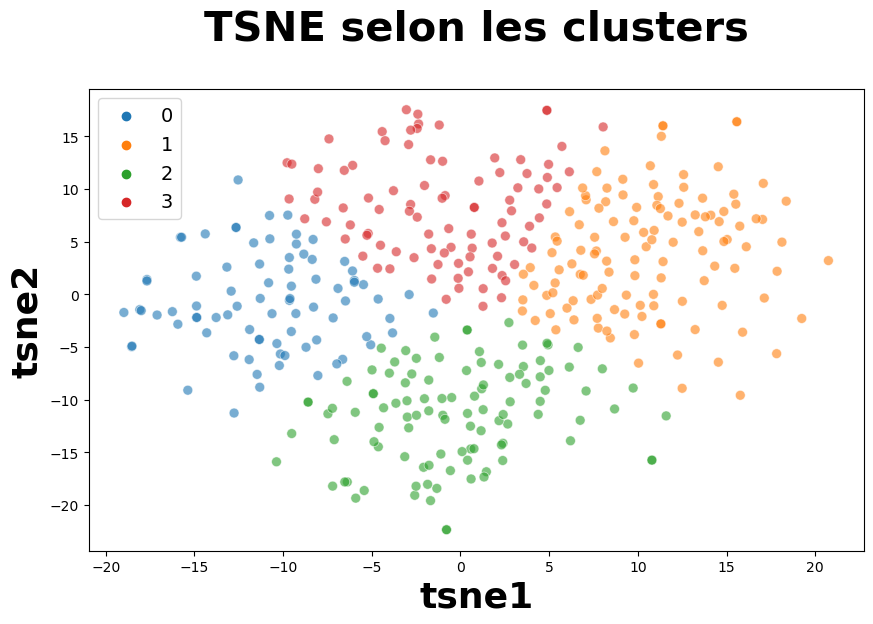

ARI :  0.1212811233073289


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analyse par classes
* La matrice de confusion doit être transformée pour mettre avoir en colonne le même ordre des catégories supposées qu'en ligne
* Cette transformation atteint ses limites pour les 2 catégories "shine" et "sunshine" qui sont peu séparées (donc elle a été réalisée manuellement au lieu d'utiliser la fonction "argmax")

In [ ]:
df_tsne.groupby("cluster").count()["class"]

cluster
0     81
1    121
2    106
3     92
Name: class, dtype: int64

In [ ]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[ 3 51  4 42]
 [14 24 59  3]
 [29 30 26 15]
 [35 16 17 32]]


In [ ]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [3, 1, 2, 0]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [3, 1, 2, 0]
[[42 51  4  3]
 [ 3 24 59 14]
 [15 30 26 29]
 [32 16 17 35]]

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       100
           1       0.20      0.24      0.22       100
           2       0.25      0.26      0.25       100
           3       0.43      0.35      0.39       100

    accuracy                           0.32       400
   macro avg       0.33      0.32      0.32       400
weighted avg       0.33      0.32      0.32       400



<AxesSubplot:>

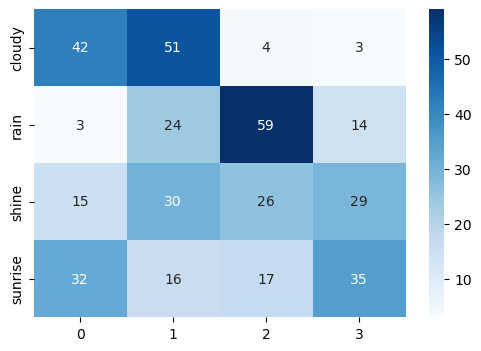

In [ ]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")